In [70]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [71]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [73]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [74]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [76]:
import os
import pandas as pd
import random
import shutil
from sklearn.model_selection import train_test_split
import numpy as np

In [77]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [78]:
pip install seaborn

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from scikeras.wrappers import KerasClassifier # For Keras model wrapper
'''
# Import HyperModel from keras-tuner
from keras_tuner import HyperModel
from tensorflow.keras.callbacks import EarlyStopping  # For early stopping (optional)
# Perform Hyperparameter Tuning with GridSearch
from tensorflow.keras.utils import to_categorical  # For categorical crossentropy
'''

'\n# Import HyperModel from keras-tuner\nfrom keras_tuner import HyperModel\nfrom tensorflow.keras.callbacks import EarlyStopping  # For early stopping (optional)\n# Perform Hyperparameter Tuning with GridSearch\nfrom tensorflow.keras.utils import to_categorical  # For categorical crossentropy\n'

In [80]:
import matplotlib as plt
import seaborn as sns

In [81]:
from sklearn.metrics import roc_curve, auc

In [82]:
%run clearence.py

In [83]:
%run datapreparation.py

15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15


## LSTM

In [84]:
# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(4, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Define the optimizer with learning rate
custom_adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the custom optimizer
lstm_model.compile(loss='categorical_crossentropy', optimizer=custom_adam_optimizer, metrics=['accuracy'])

# Convert labels to categorical one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=4)

# Train the model
history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

Epoch 1/10


c:\Users\Javie_nzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.3774 - loss: 1.4005 - val_accuracy: 0.6471 - val_loss: 1.1534
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5773 - loss: 1.1097 - val_accuracy: 0.6909 - val_loss: 0.9870
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6415 - loss: 0.9683 - val_accuracy: 0.6978 - val_loss: 0.8934
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7052 - loss: 0.8660 - val_accuracy: 0.7177 - val_loss: 0.8230
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7352 - loss: 0.7570 - val_accuracy: 0.7296 - val_loss: 0.8073
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7436 - loss: 0.7341 - val_accuracy: 0.7356 - val_loss: 0.7817
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7743 - loss: 0.6732 - val_accuracy: 0.7247 - val_loss: 0.7909
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7727 - loss: 0.6760 - val_accuracy: 0.7326 - val_loss: 0.

In [85]:
loss, accuracy = lstm_model.evaluate(X_train, y_train)
print("LSTM Train Loss:", loss)
print("LSTM Train Accuracy:", accuracy)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7285 - loss: 0.7016
LSTM Train Loss: 0.6332125067710876
LSTM Train Accuracy: 0.7728873491287231


In [86]:
# Convert labels to categorical one-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)

# Evaluate the model
loss, accuracy = lstm_model.evaluate(X_test, y_test)
print("LSTM Test Loss:", loss)
print("\033[92m\033[1mLSTM Test Accuracy:\033[0m", "\033[92m" + str(accuracy) + "\033[0m")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6009 - loss: 1.1118 
LSTM Test Loss: 1.0528252124786377
LSTM Test Accuracy: 0.5813953280448914


In [87]:
y_pred = lstm_model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


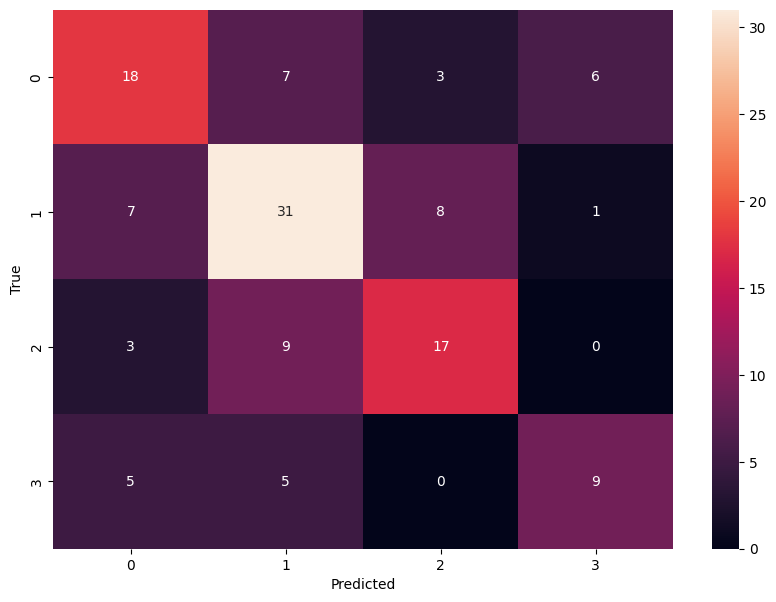

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

# Get the predicted classes
predicted_classes = np.argmax(y_pred, axis=-1)

# Assuming y_test is your true labels
true_classes = np.argmax(y_test, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

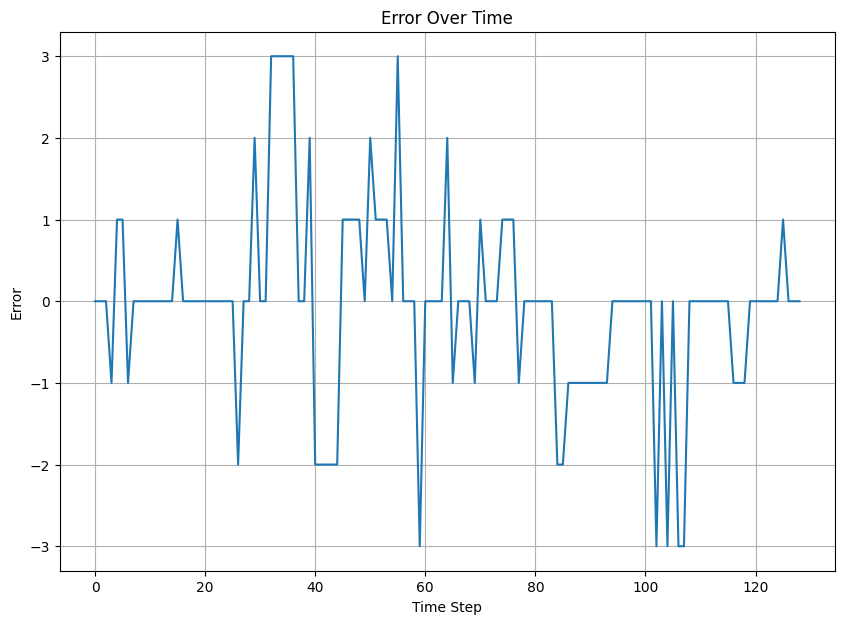

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate error
error = predicted_classes - true_classes

# Generate time steps
time_steps = np.arange(len(error))

# Plot error over time
plt.figure(figsize=(10, 7))
plt.plot(time_steps, error)
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.title('Error Over Time')
plt.grid(True)
plt.show()

## Deep LSTM

Return Sequence. Distribution (Dense)

In [90]:
adam_optimizer = Adam(learning_rate=0.001)

from keras.layers import TimeDistributed

deep_lstm_model = Sequential()
deep_lstm_model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
deep_lstm_model.add(LSTM(64, return_sequences=True))
deep_lstm_model.add(LSTM(32, return_sequences=False)) 
deep_lstm_model.add(Dense(4, activation='softmax'))  

deep_lstm_model.compile(loss='categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

history = deep_lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64)

c:\Users\Javie_nzb\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.5166 - loss: 1.1872 - val_accuracy: 0.6879 - val_loss: 0.8795
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6749 - loss: 0.8262 - val_accuracy: 0.7177 - val_loss: 0.7887
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7328 - loss: 0.6991 - val_accuracy: 0.6988 - val_loss: 0.8058
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7438 - loss: 0.6684 - val_accuracy: 0.7435 - val_loss: 0.7362
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7532 - loss: 0.6292 - val_accuracy: 0.7197 - val_loss: 0.7669
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7658 - loss: 0.5772 - val_accuracy: 0.7018 - val_loss: 0.8047
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.7778 - loss: 0.5625 - val_accuracy: 0.6918 - val_loss: 0.8211
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7679 - loss: 0.5899 - val_accuracy: 0.6809 - 

In [91]:
loss, accuracy = deep_lstm_model.evaluate(X_train, y_train)
print("Deep LSTM Train Loss:", loss)
print("Deep LSTM Train Accuracy:", accuracy)

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8100 - loss: 0.4425
Deep LSTM Train Loss: 0.4218851625919342
Deep LSTM Train Accuracy: 0.8245305418968201


In [92]:
loss, accuracy = deep_lstm_model.evaluate(X_test, y_test)
print("Deep LSTM Test Loss:", loss)
print("\033[92m\033[1mDeep LSTM Test Accuracy:\033[0m", "\033[92m" + str(accuracy) + "\033[0m")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5888 - loss: 1.3333
Deep LSTM Test Loss: 1.329136610031128
Deep LSTM Test Accuracy: 0.5503876209259033


In [93]:
y_pred = deep_lstm_model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 283ms/step


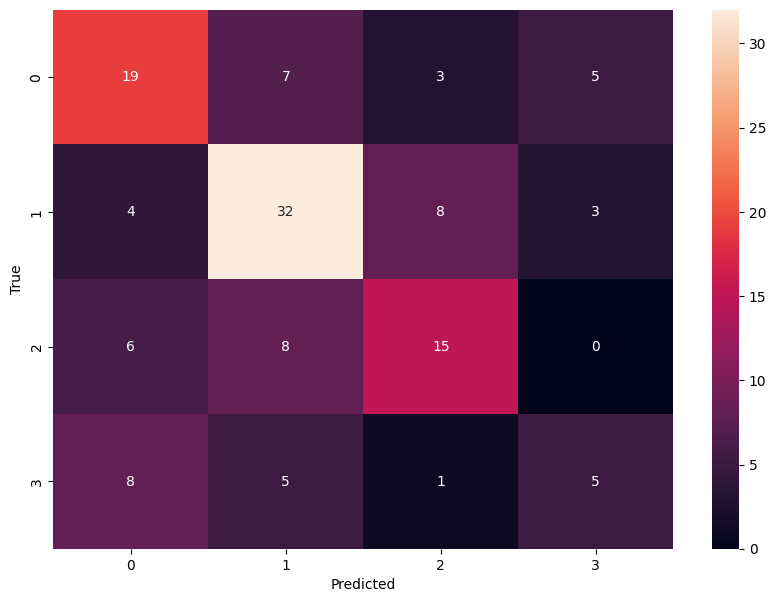

In [94]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted classes
predicted_classes = np.argmax(y_pred, axis=-1)

# Assuming y_test is your true labels
true_classes = np.argmax(y_test, axis=-1)

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

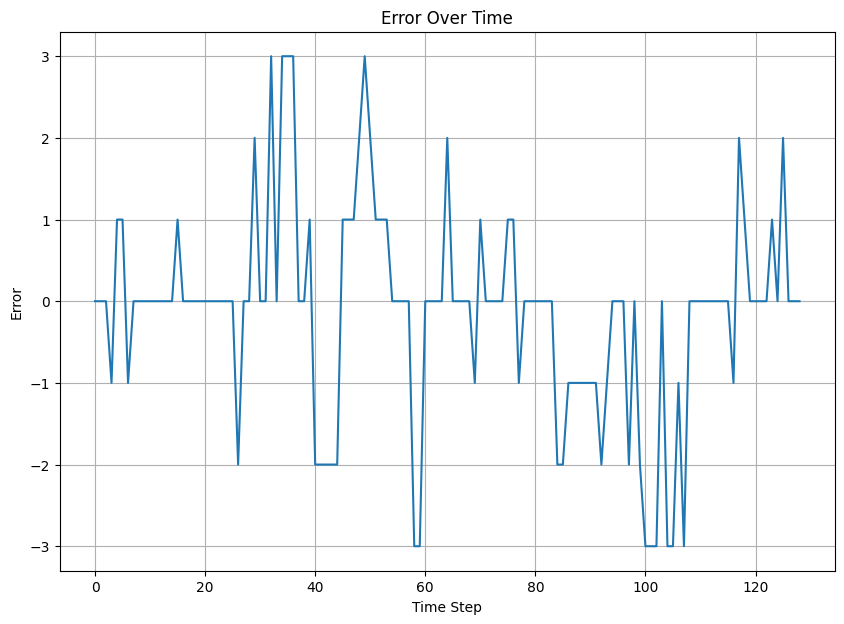

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate error
error = predicted_classes - true_classes

# Generate time steps
time_steps = np.arange(len(error))

# Plot error over time
plt.figure(figsize=(10, 7))
plt.plot(time_steps, error)
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.title('Error Over Time')
plt.grid(True)
plt.show()

## Bidirectional LSTM

In [96]:
from keras.layers import Bidirectional
from keras.preprocessing.sequence import pad_sequences

In [99]:
X_train_padded = pad_sequences(X_train, maxlen=15)
X_val_padded = pad_sequences(X_val, maxlen=15)
X_test_padded = pad_sequences(X_test, maxlen=15)
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [103]:
# Defining the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(4, 6)))  # Adjusted number of time steps
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Removed input_shape from second layer
model.add(TimeDistributed(Dense(4, activation='softmax')))  # Change number of units to number of classes

# Creating an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=0.001)

# Compiling the model with the custom optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])  # Change loss function

# Training the model
model.fit(X_train_padded, y_train, epochs=10, batch_size=8, validation_data=(X_val_padded, y_val))

# Evaluating the model on test set
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(8, 4, 2), output.shape=(8, 15, 4)